#  Problem Statement 
 WE have to predict the sale price of house located in chennai
 since we are gonna predict the sale which is a dependent variable hence it is a supervised learning and it has continous variable thus regression 

# Hypothesis
sales price should increase with increase in interior square feet<br>
sales price depend on the area where house is located
higher the no of rooms and bathrooms higher will be the price

# loading the dataset

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# this is used to ensure that the plot obtained must be seen in jupyter notebook
%matplotlib inline

In [2]:
# reading the data from the file
df = pd.read_csv("chennai_house_price_prediction.csv")

In [3]:
# dimensions
df.shape

(7109, 19)

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


# Data Exploration

In [5]:
# describing the dataset
# for only continous variables
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [6]:
# for all continous and categorical variables
df.describe(include="all")

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P09925,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [7]:
# finding missing values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
# datatypes of each variable
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [9]:
# creating temp table to store some information
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


# Univariate analysis

Text(0.5, 0, 'sales')

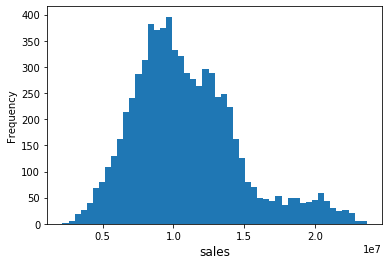

In [10]:
# histograms
df['SALES_PRICE'].plot.hist(bins=50)
plt.xlabel('sales',fontsize = 12)

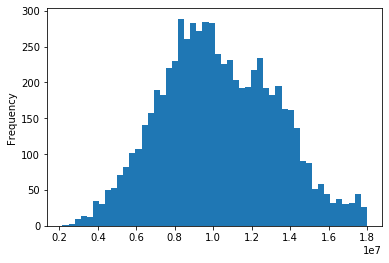

In [11]:
# applying contion in data
df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000].plot.hist(bins=50)

Text(0.5, 0, 'area in sq feet')

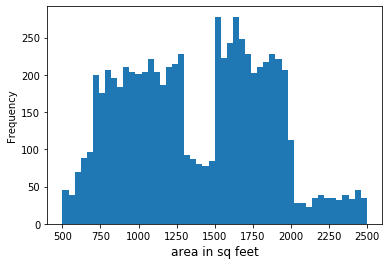

In [12]:
df['INT_SQFT'].plot.hist(bins=50)
plt.xlabel('area in sq feet',fontsize = 12)

Text(0.5, 0, 'commision')

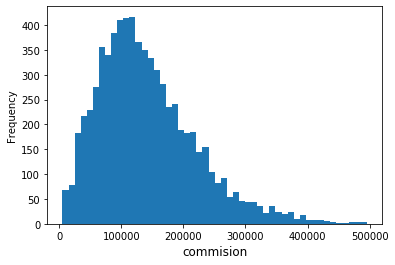

In [13]:
df['COMMIS'].plot.hist(bins=50)
plt.xlabel('commision',fontsize=12)

value counts of categorical variables


In [14]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [15]:
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

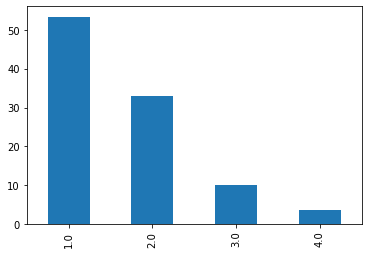

In [16]:
# bar plot of categorical variable 
(df['N_BEDROOM'].value_counts()/len(df)*100).plot(kind = 'bar')

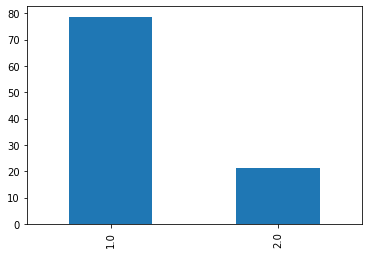

In [17]:
(df['N_BATHROOM'].value_counts()/len(df)*100).plot(kind = 'bar')

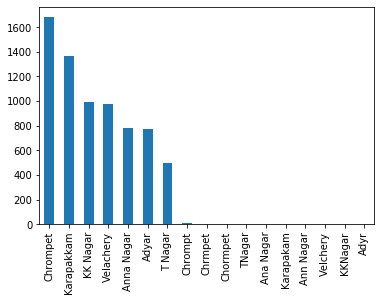

In [18]:
df['AREA'].value_counts().plot(kind = 'bar')

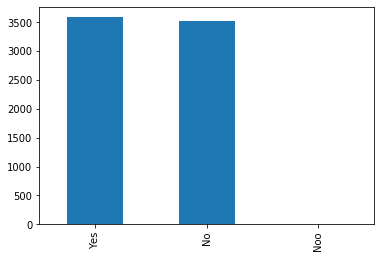

In [19]:
df['PARK_FACIL'].value_counts().plot(kind = 'bar')

# Data Manipulation
1) droping duplicated values <br>
2) Fill the missing values<br>
3) correcting the datatypes<br>
4) fixing spelling errors<br>

In [20]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [21]:
df.drop_duplicates().shape

(7109, 19)

In [22]:
df.shape

(7109, 19)

this shows we have no duplicates entries 

# Treating Missing Values

In [23]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

1.N_BEDROOM

In [24]:
# since there is only 1 row having null value for bedroom
# thus we can simply replace it with the mode value
# checking the mode value
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [25]:
df['N_BEDROOM'].fillna(value = (df['N_BEDROOM'].mode()[0]),inplace = True)

2. N_BATHROOM

In [26]:
df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [27]:
for i in range(len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if(df['N_BEDROOM'][i]==1.0):
            df['N_BATHROOM'][i]=1.0
        else:
            df['N_BATHROOM'][i]=2.0

C:\Users\akash\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\akash\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3. QS_OVERALL

In [28]:
df[["QS_ROOMS","QS_BEDROOM","QS_BATHROOM","QS_OVERALL"]].head()

,QS_ROOMS,QS_BEDROOM,QS_BATHROOM,QS_OVERALL
0,4.0,4.9,3.9,4.330
1,4.9,2.5,4.2,3.765
2,4.1,2.2,3.8,3.090
3,4.7,3.6,3.9,4.010
4,3.0,4.1,2.5,3.290


In [29]:
temp = (df['QS_ROOMS']+df['QS_BEDROOM']+df['QS_BATHROOM'])/3
pd.concat([df['QS_ROOMS'],df['QS_BEDROOM'],df['QS_BATHROOM'],temp], axis =1).head(10)

,QS_ROOMS,QS_BEDROOM,QS_BATHROOM,0
0,4.0,4.9,3.9,4.266667
1,4.9,2.5,4.2,3.866667
2,4.1,2.2,3.8,3.366667
3,4.7,3.6,3.9,4.066667
4,3.0,4.1,2.5,3.200000
5,4.5,3.1,2.6,3.400000
6,3.6,2.5,2.1,2.733333
7,2.4,2.1,4.5,3.000000
8,2.9,4.0,3.7,3.533333
9,3.1,3.3,3.1,3.166667


In [30]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(48, 19)

In [31]:
def fill_na(x):
    return ((x['QS_ROOMS'] + x['QS_BATHROOM']+x['QS_BEDROOM'])/3)

In [32]:
df['QS_OVERALL'] = df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis =1)

In [33]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

# Data Types And some correction

In [34]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [35]:
# changing data type of N_BEDROOM , N_ROOM , N_BATHROOM from float to object
df = df.astype({'N_BEDROOM' : 'object' , 'N_ROOM' : 'object' , 'N_BATHROOM' : 'object'})

Replace Categories or Correction in the names

In [36]:
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('***********value count i ' , i , '***************' )
    print(df[i].value_counts())
    print('')

***********value count i  AREA ***************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

***********value count i  N_BEDROOM ***************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

***********value count i  N_BATHROOM ***************
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

***********value count i  N_ROOM ***************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

***********value count i  SALE_COND ***************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name:

# Update names in columns
AREA <br>
SALE_COND <br>
PARK_FACIL<br>
BUILDTYPE<br>
UTILITY_AVAIL<br>
STREET<br>

In [37]:
df['AREA'].replace({'Chrompt':'Chrompet', 'Chormpet':'Chrompet', 'Chrmpet':'Chrompet', 'Karapakam':'Karapakkam',
                    'KKNagar': 'KK Nagar','Velchery': 'Velachery', 'Ana Nagar' :'Anna Nagar','Ann Nagar':'Anna Nagar', 
                    'Adyr':'Adyar', 'TNagar': 'T Nagar'},inplace =True)

In [38]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [39]:
df['SALE_COND'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal',
                         'Partiall':'Partial','PartiaLl':'Partial'} ,inplace = True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [40]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace =True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [41]:
df['BUILDTYPE'].replace({'Comercial': 'Commercial','Other':'Others'},inplace= True)
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [42]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub','NoSewr':'NoSeWa'},inplace =True)
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [43]:
df['UTILITY_AVAIL'].replace({'NoSewr ':'NoSeWa'},inplace =True)
df['UTILITY_AVAIL'].value_counts()

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [44]:
df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace =True)
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

# Bivariate analysis

In [45]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

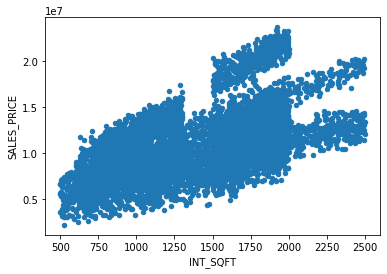

In [46]:
# sales price must increase with the interior are(target)
df.plot.scatter('INT_SQFT','SALES_PRICE')

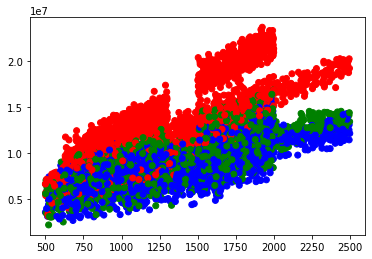

In [47]:
# FOR MORE detailed understanding we are gonna devide the buildtype also
fig , ax = plt.subplots()
colors = {'Commercial':'red','House':'blue','Others':'green'}
ax.scatter(df['INT_SQFT'], df['SALES_PRICE'],c = df['BUILDTYPE'].apply(lambda x : colors[x]))
plt.show()

In [48]:
# sale price of houses wrt no of rooms
df.pivot_table(values = 'SALES_PRICE' , index = 'N_BEDROOM' , columns = 'N_BATHROOM' ,aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


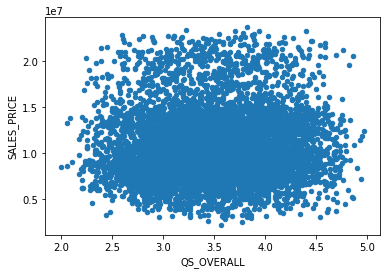

In [49]:
# sales price as per quality score of the house
df.plot.scatter('QS_OVERALL','SALES_PRICE')

Text(0.5, 1.0, 'QS_OVERALL')

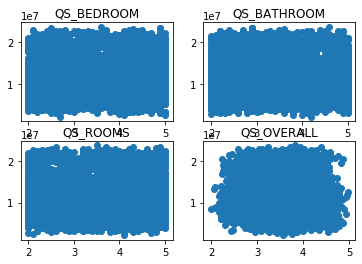

In [50]:
# we are not getting any pattern between sales price and overall quality score
# thus we can just create subplots for better understanding

fog, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)

axs[0,0].scatter(df['QS_BEDROOM'],df['SALES_PRICE'])
axs[0,0].set_title('QS_BEDROOM')

axs[0,1].scatter(df['QS_BATHROOM'],df['SALES_PRICE'])
axs[0,1].set_title('QS_BATHROOM')

axs[1,0].scatter(df['QS_ROOMS'],df['SALES_PRICE'])
axs[1,0].set_title('QS_ROOMS')

axs[1,1].scatter(df['QS_OVERALL'],df['SALES_PRICE'])
axs[1,1].set_title('QS_OVERALL')


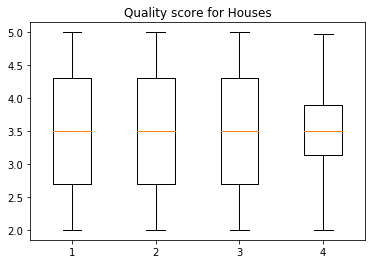

In [51]:
# compairing above 4 plot among themselves
ax = plt.figure().add_subplot(111)
ax.set_title('Quality score for Houses')

# create the boxplot
bp = ax.boxplot([df['QS_BEDROOM'],df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_OVERALL']])

In [52]:
# SALES PRICE AS PER THE BUILDING TYPE
df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

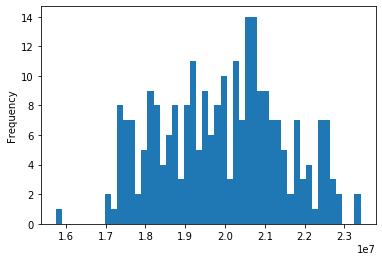

In [53]:
temp_df = df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

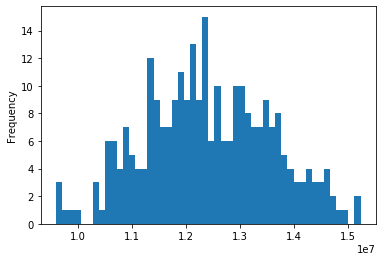

In [54]:
temp_df = df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

In [55]:
df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

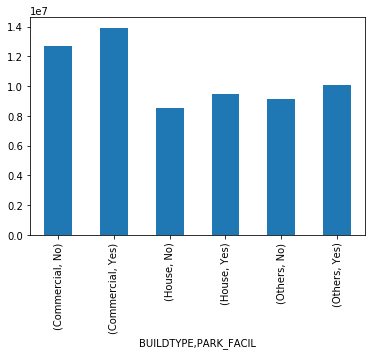

In [56]:
#plotting the bar plot 
temp=df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind='bar',stacked=True)

In [57]:
# average price for each area category
df.pivot_table(values='SALES_PRICE', index = 'AREA',aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


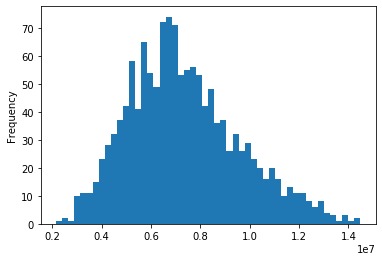

In [58]:
tempdf = df.loc[(df['AREA']=='Karapakkam')]
tempdf['SALES_PRICE'].plot.hist(bins=50)

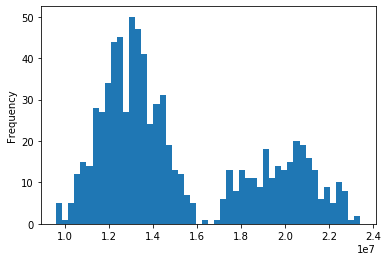

In [59]:
tempdf = df.loc[(df['AREA']=='Anna Nagar')]
tempdf['SALES_PRICE'].plot.hist(bins=50)

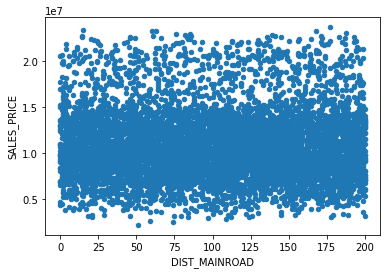

In [60]:
df.plot.scatter('DIST_MAINROAD','SALES_PRICE')

In [61]:
df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9406050
Paved        10470070
Name: SALES_PRICE, dtype: int64

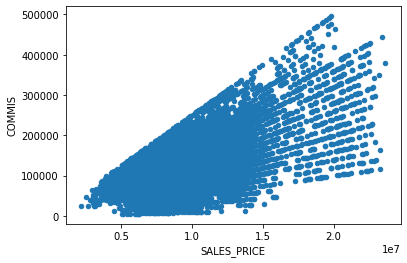

In [62]:
# commision and sales price
df.plot.scatter('SALES_PRICE','COMMIS')

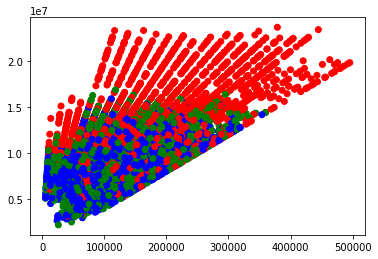

In [63]:
fig , ax = plt.subplots()
colors = {'Commercial':'red','House':'blue','Others':'green'}
ax.scatter(df['COMMIS'], df['SALES_PRICE'],c = df['BUILDTYPE'].apply(lambda x : colors[x]))
plt.show()

In [64]:
 df[['SALES_PRICE' ,'COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


In [66]:
df = pd.get_dummies(df.drop(['PRT_ID'],axis=1))
df.head()

,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,AREA_Adyar,AREA_Anna Nagar,...,UTILITY_AVAIL_NoSeWa,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,4.0,3.9,4.9,4.330,144400,7600000,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,4.9,4.2,2.5,3.765,304049,21717770,0,1,...,0,1,0,0,0,0,0,1,0,0
2,909,70,4.1,3.8,2.2,3.090,92114,13159200,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,4.7,3.9,3.6,4.010,77042,9630290,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,3.0,2.5,4.1,3.290,74063,7406250,0,0,...,0,1,0,0,0,1,0,0,0,0


In [67]:
df.to_csv("cleaned_house_price_prediction.csv")